# Slurp public photometry and spectroscopy at an FRB position
    v1 - DES
    v2 - FIRST
    v3 - Datalab update
    v4 - WISE
    v5 - Pan-STARRS

In [1]:
# imports
from matplotlib import pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units
from astropy.wcs import WCS
from astropy.table import Table

from frb.surveys import survey_utils,images

## DES

### Target

In [2]:
coord = SkyCoord('J214425.25-403400.81', unit=(units.hourangle, units.deg))
search_r = 10 * units.arcsec

### Catalog

In [3]:
des_srvy = survey_utils.load_survey_by_name('DES', coord, search_r)
des_tbl = des_srvy.get_catalog(print_query=True)

SELECT mag_auto_g, magerr_auto_g, mag_auto_r, magerr_auto_r, mag_auto_i, magerr_auto_i, mag_auto_z, magerr_auto_z, mag_auto_y, magerr_auto_y, coadd_object_id, ra, dec, tilename
    FROM des_dr1.main
    WHERE q3c_radial_query(ra,dec,326.105208,-40.566892,0.002778)
    


In [4]:
des_tbl

DES_g,DES_g_err,DES_r,DES_r_err,DES_i,DES_i_err,DES_z,DES_z_err,DES_Y,DES_Y_err,DES_ID,ra,dec,DES_tile
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str12
23.9905,0.194438,22.3105,0.0595304,20.9695,0.029651599999999997,20.4385,0.0391535,20.292,0.100701,209895628,326.105565,-40.569421999999996,DES2143-4040


### Cut-out

In [5]:
cutout, cutout_hdr = des_srvy.get_cutout(search_r, band='r')

In [6]:
wcs = WCS(des_srvy.cutout_hdr)

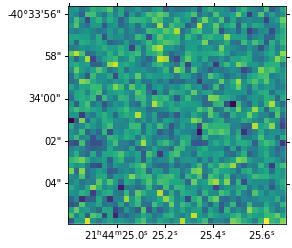

In [7]:
plt.clf()
plt.subplot(projection=wcs)
plt.imshow(cutout, origin='lower')
plt.show()

## FIRST

In [8]:
coord2 = SkyCoord('J081240.68+320809', unit=(units.hourangle, units.deg))
search_r = 10 * units.arcsec

In [9]:
first_srvy = survey_utils.load_survey_by_name('FIRST', coord2, search_r)
first_tbl = first_srvy.get_catalog()

In [10]:
first_tbl

NAME,ra,dec,FLUX_20_CM,FLUX_20_CM_ERROR,INT_FLUX_20_CM,SIDELOBE_PROB,TWOMASS_FIRST_OFFSET,TWOMASS_KMAG,SEARCH_OFFSET_,separation
,deg,deg,MJY,MJY,MJY,,ARCSEC,MAG,,arcmin
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes46,float64
FIRST J081240.6+320808,123.169512,32.135697,18.32,0.146,18.40,0.014,0.31,15.31,"0.008 (123.16950579044646,32.135827323283664)",0.008202689831452928


## DECals

In [11]:
dec_srvy = survey_utils.load_survey_by_name('DECaL', coord2, search_r)
dec_tbl = dec_srvy.get_catalog()

/home/sunil/Python/FRB/frb/surveys/decals.py:72: RuntimeWarning: invalid value encountered in log10
  main_cat[col] = 2.5*np.log10(1+1/main_cat[col])


In [12]:
dec_tbl

DECaL_ID,brick_primary,DECaL_brick,ra,dec,gaia_pointsource,DECaL_g,DECaL_r,DECaL_z,DECaL_W1,DECaL_W2,DECaL_W3,DECaL_W4,DECaL_g_err,DECaL_r_err,DECaL_z_err,DECaL_W1_err,DECaL_W2_err,DECaL_W3_err,DECaL_W4_err
int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7696614636322962,1,507231,123.167713619484,32.134174062069604,1,20.6186,19.535,18.9672,20.2099,20.48,21.3003,--,0.007256360834067985,0.007982568673460984,0.007814739929190646,0.07832187981015029,0.21470213862981402,2.679314369034259,--
7696614636322963,1,507231,123.169525538404,32.1357157995354,1,17.8242,17.4195,17.0851,17.0561,16.8557,15.5268,14.7015,0.0014214222908951032,0.0020216110125220307,0.001729174292837341,0.0044248999778223885,0.008419930718058386,0.05615569977134137,0.16856857361907246


# WISE

In [13]:
wise_srvy = survey_utils.load_survey_by_name('WISE', coord2, 10*units.arcsec)
wise_tbl = wise_srvy.get_catalog()

In [14]:
wise_tbl

source_id,ra,dec,W1,W2,W3,W4,W1_err,W2_err,W3_err,W4_err
str20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1235p318_ac51-042682,123.169529,32.135735100000005,14.369000000000002,13.519,10.282,8.198,0.03,0.032,0.077,0.264


----

## Testing

In [15]:
tmp = 'mag_auto_g,magerr_auto_g,mag_auto_r,magerr_auto_r,mag_auto_i,magerr_auto_i,mag_auto_z,magerr_auto_z,mag_auto_y,magerr_auto_y,coadd_object_id,ra,dec,tilename\n23.9905,0.194438,22.3105,0.0595304,20.9695,0.0296516,20.4385,0.0391535,20.292,0.100701,209895628,326.105565,-40.569422,DES2143-4040\n'

## Pan-STARRS 

In [16]:
coord3 = SkyCoord(0, 0,unit="deg")
ps_srvy = survey_utils.load_survey_by_name('Pan-STARRS',coord3,30*units.arcsec)
ps_tbl = ps_srvy.get_catalog()

In [17]:
ps_tbl

Pan-STARRS_ID,ra,dec,f_objID,Qual,Pan-STARRS_g,Pan-STARRS_r,Pan-STARRS_i,Pan-STARRS_z,Pan-STARRS_y,Pan-STARRS_g_err,Pan-STARRS_r_err,Pan-STARRS_i_err,Pan-STARRS_z_err,Pan-STARRS_y_err,separation
,deg,deg,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,arcmin
int64,float64,float64,int64,int16,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64
107990000054816431,0.005490070,-0.003355260,436527104,52,--,22.0139,21.7694,21.2010,--,--,0.1865,0.0227,0.0368,--,0.38605064131142824


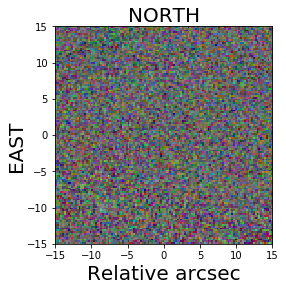

In [18]:
img, = ps_srvy.get_cutout(filt="gri",imsize=30*units.arcsec)
plt = images.gen_snapshot_plt(img,imsize=30*units.arcsec,show=True)

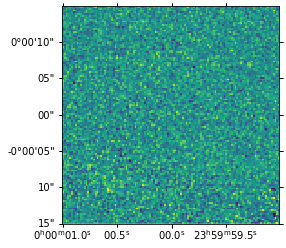

In [19]:
fits_img = ps_srvy.get_image(imsize=30*units.arcsec)
wcsinfo = WCS(fits_img.header)
plt.subplot(projection=wcsinfo)
plt.imshow(fits_img.data, origin='lower')
plt.show()